In [19]:
# Instalação de bibliotecas
!pip install pandas
!pip install sklearn
!pip install yellowbrick

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [20]:
# Importação de bibliotecas
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV # Importação do GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, make_scorer, f1_score
from yellowbrick.classifier import ConfusionMatrix

In [21]:
# Carregamento dos dados
base_treino = pd.read_csv("base_princ_modificado.csv")

In [22]:
print("Primeiras linhas do DataFrame:")
display(base_treino.head())


print("\nEstatísticas descritivas do DataFrame:")
display(base_treino.describe())


# Distribuição das classes na variável alvo
print("\nDistribuição das classes na variável alvo:")
print(base_treino['Situação de trabalho'].value_counts())
#Verifico que há uma discrepância entre as classes.

Primeiras linhas do DataFrame:


,Idade,Genero,Cor/raca/etnia,PCD,UF,Regiao onde mora,Nível de Ensino,Área de formação,Situação de trabalho
0,31,0,0,0,12,2,5,0,0
1,30,0,0,0,7,2,2,0,0
2,37,1,2,0,24,2,2,0,0
3,22,0,1,0,24,2,1,0,1
4,34,0,0,0,12,2,5,1,0



Estatísticas descritivas do DataFrame:


,Idade,Genero,Cor/raca/etnia,PCD,UF,Regiao onde mora,Nível de Ensino,Área de formação,Situação de trabalho
count,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000
mean,31.958342,0.247359,0.908312,0.021327,17.874028,2.171417,2.592386,1.319115,0.088300
std,7.550393,0.431520,1.343053,0.144488,6.710706,0.774466,1.000342,1.719465,0.283759
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,12.000000,2.000000,2.000000,0.000000,0.000000
50%,30.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,1.000000,0.000000
75%,36.000000,0.000000,3.000000,0.000000,24.000000,3.000000,3.000000,2.000000,0.000000
max,73.000000,1.000000,6.000000,1.000000,26.000000,4.000000,5.000000,7.000000,1.000000



Distribuição das classes na variável alvo:
Situação de trabalho
0    4574
1     443
Name: count, dtype: int64


In [23]:
# Assumindo que 'Situação de trabalho' é a variável alvo
X = base_treino.drop(columns=['Situação de trabalho'])
y = base_treino['Situação de trabalho']

# Divisão dos dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, min_samples_split=10, random_state=42)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

Acurácia do modelo inicial: 0.9115537848605577

Relatório de Classificação do modelo inicial:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1146
           1       0.33      0.02      0.03       109

    accuracy                           0.91      1255
   macro avg       0.62      0.51      0.49      1255
weighted avg       0.86      0.91      0.87      1255


Matriz de Confusão do modelo inicial:
[[1142    4]
 [ 107    2]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


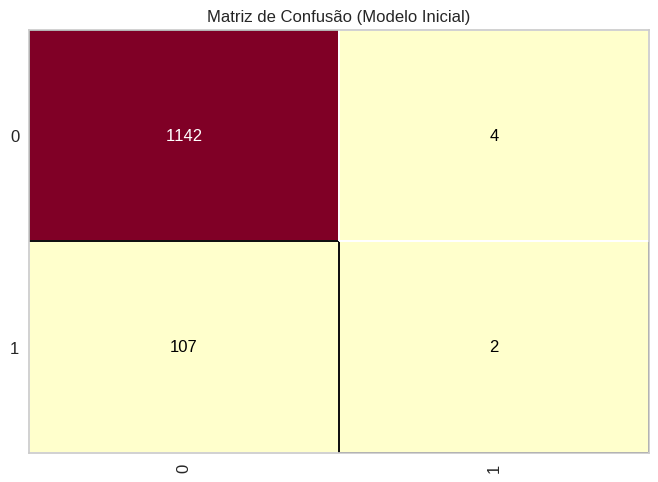

In [25]:
# Previsões no conjunto de teste
previsoes = modelo.predict(X_teste)

# Avaliação do modelo
print("Acurácia do modelo inicial:", accuracy_score(y_teste, previsoes))

print("\nRelatório de Classificação do modelo inicial:")
print(classification_report(y_teste, previsoes))

print("\nMatriz de Confusão do modelo inicial:")
print(confusion_matrix(y_teste, previsoes))

# Visualização da Matriz de Confusão com Yellowbrick
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)
plt.title("Matriz de Confusão (Modelo Inicial)")
plt.show()

Versão 02 da Arvore de decisão


--- Abordagem: Ajuste de Hiperparâmetros com GridSearchCV ---

Melhores hiperparâmetros encontrados (foco na classe 1): {'class_weight': {0: 1, 1: 10}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}

Acurácia do melhor modelo (GridSearchCV - Treino): 0.7102604997341839

Acurácia do melhor modelo (GridSearchCV - Teste): 0.6772908366533864

Avaliação do melhor modelo (GridSearchCV - foco na classe 1):
Acurácia: 0.6772908366533864

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1146
           1       0.13      0.47      0.20       109

    accuracy                           0.68      1255
   macro avg       0.53      0.58      0.50      1255
weighted avg       0.86      0.68      0.75      1255


Matriz de Confusão:
[[799 347]
 [ 58  51]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


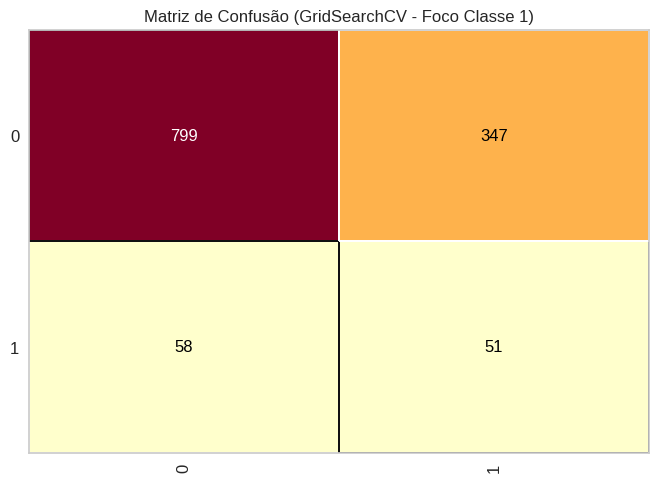

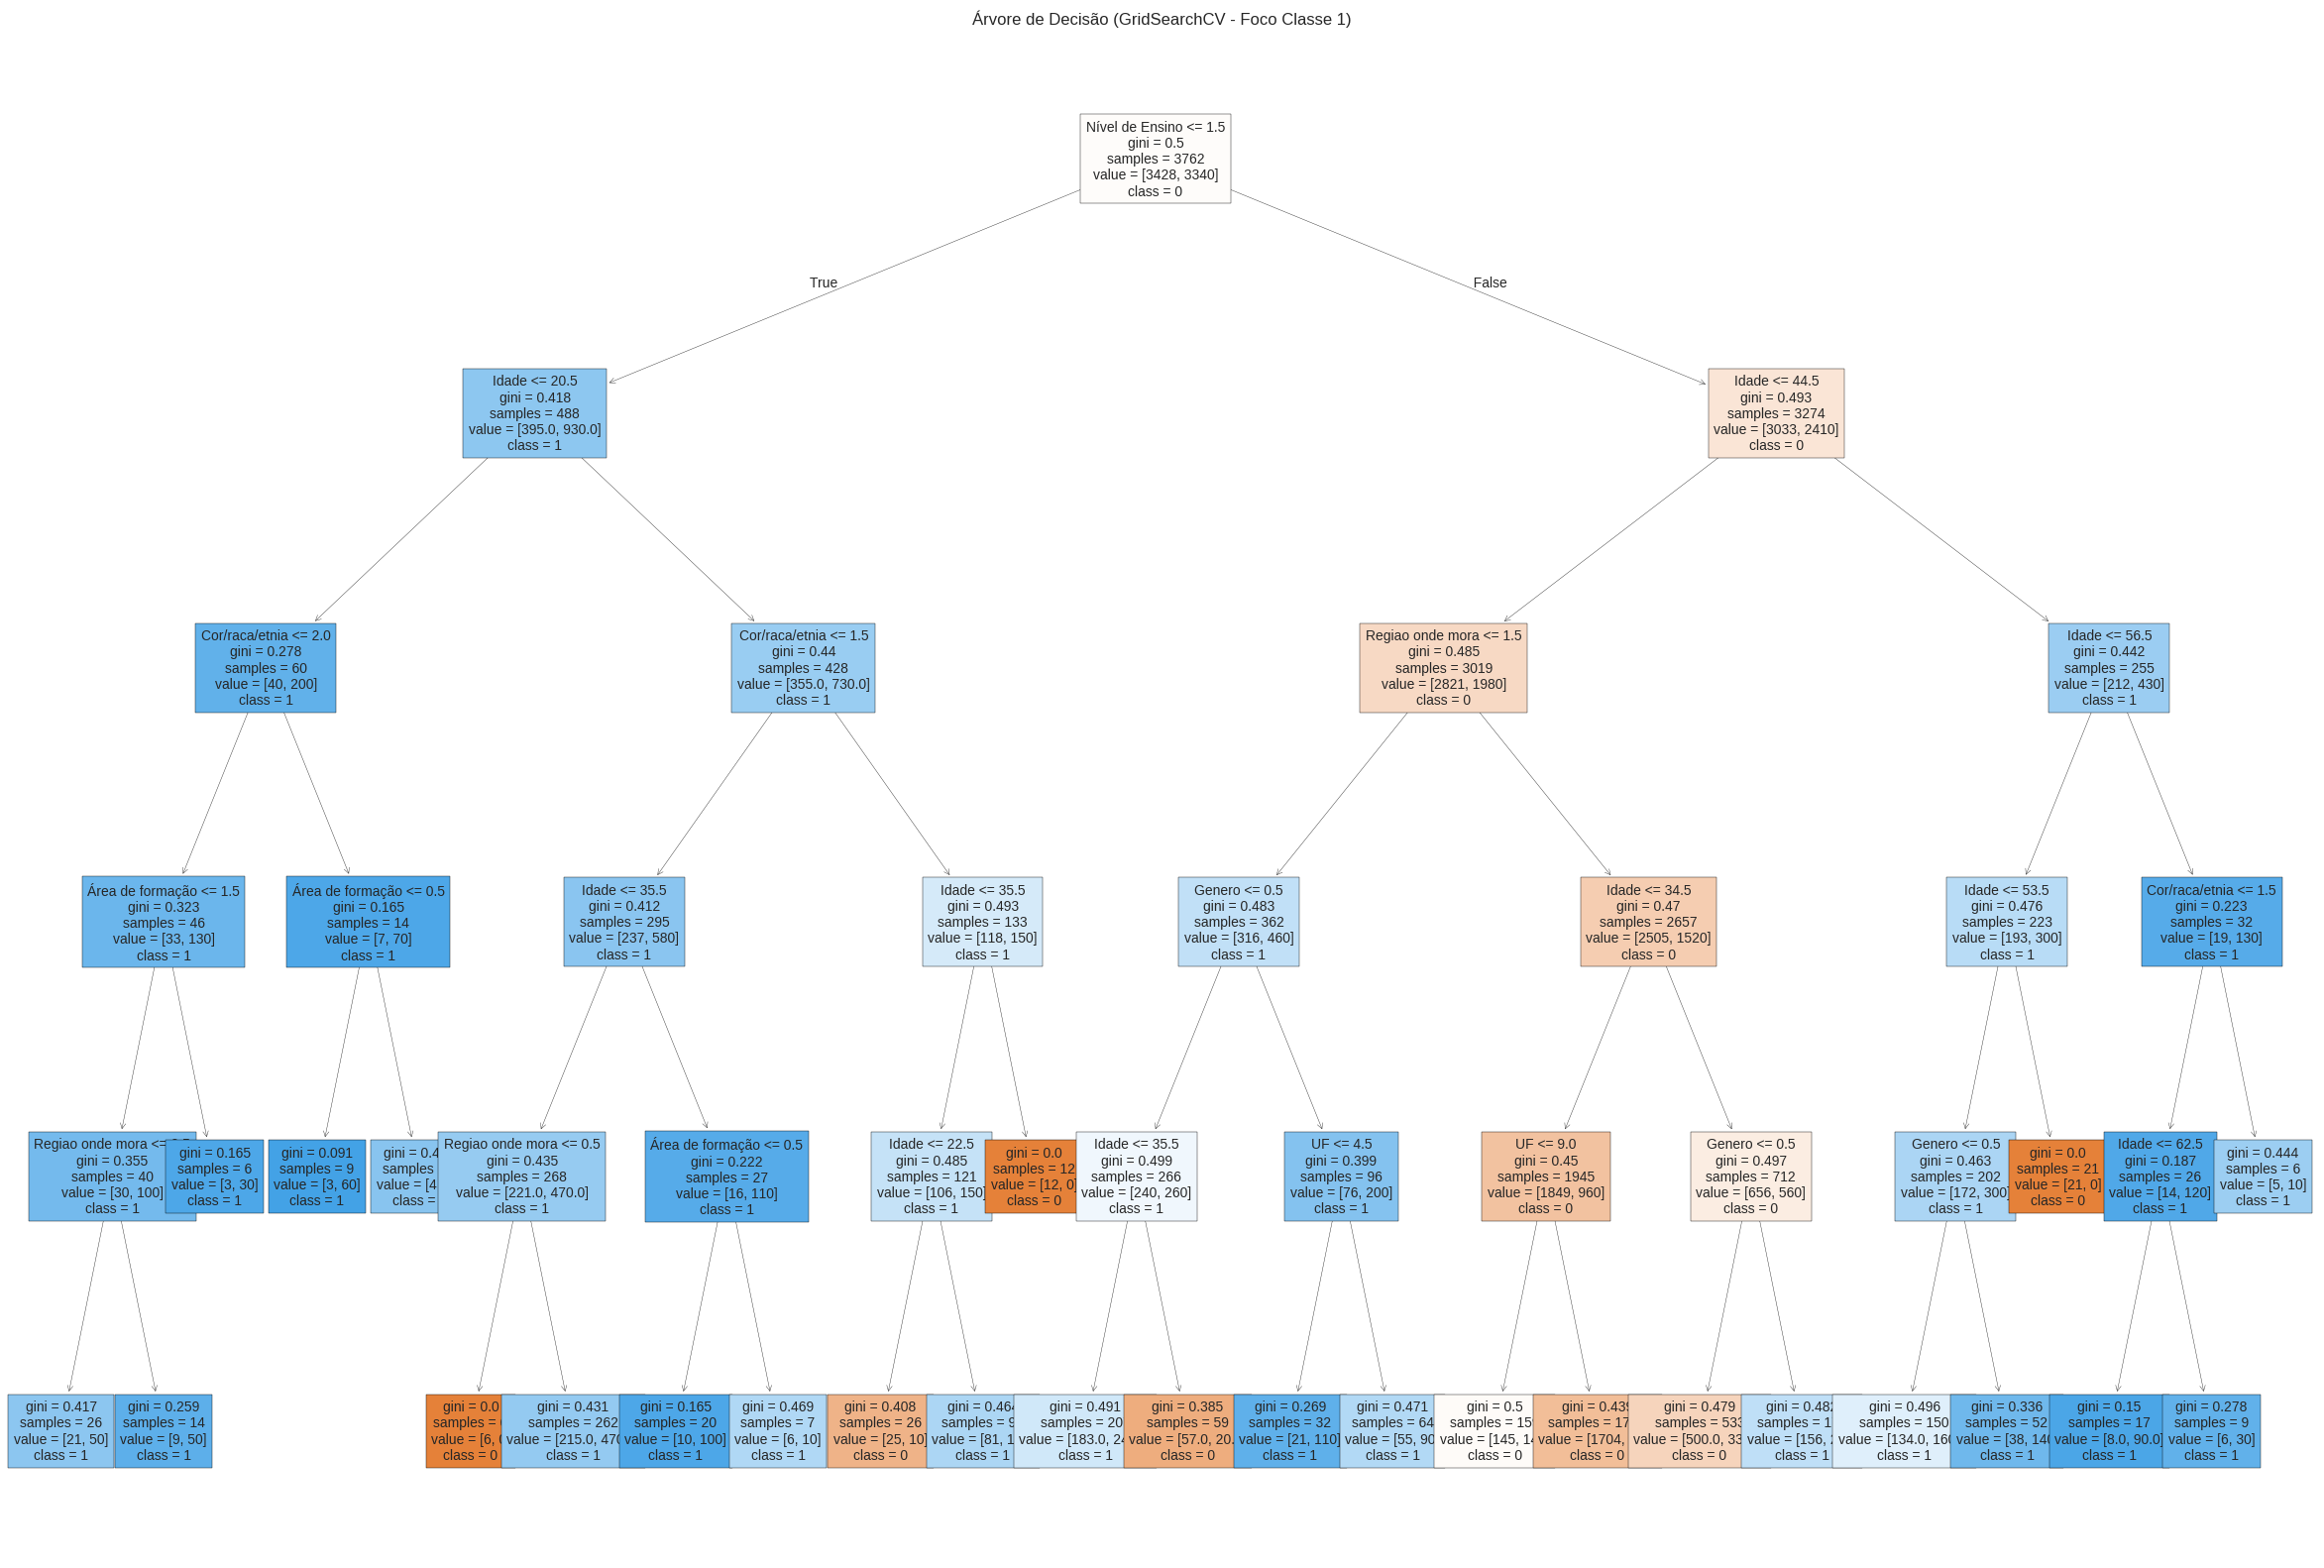

In [26]:
# Otimização de Hiperparâmetros com GridSearchCV (Foco no F1-score da Classe 1)

print("\n--- Abordagem: Ajuste de Hiperparâmetros com GridSearchCV ---")

# Defina os parâmetros que você quer otimizar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7,9,11, None],
    'min_samples_leaf': [1,3, 5, 10],
    'min_samples_split': [5,15,25],
    'class_weight': [None, 'balanced', {0:1, 1:5}, {0:1, 1:10}] # Incluindo pesos de classe
}

# %%
# Crie um scorer personalizado para a classe 1
f1_classe1_scorer = make_scorer(f1_score, labels=[1], average='weighted')

# %%
# Realize a busca em grade com validação cruzada
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring=f1_classe1_scorer)
grid_search.fit(X_treino, y_treino)

# %%
# Melhores parâmetros encontrados
print("\nMelhores hiperparâmetros encontrados (foco na classe 1):", grid_search.best_params_)

# %%
# Melhor modelo
melhor_modelo_grid = grid_search.best_estimator_

# %%
# Avaliação do melhor modelo
previsoes_grid = melhor_modelo_grid.predict(X_teste)
print("\nAcurácia do melhor modelo (GridSearchCV - Treino):", accuracy_score(y_treino, melhor_modelo_grid.predict(X_treino)))
print("\nAcurácia do melhor modelo (GridSearchCV - Teste):", accuracy_score(y_teste, previsoes_grid))
print("\nAvaliação do melhor modelo (GridSearchCV - foco na classe 1):")
print(f"Acurácia: {accuracy_score(y_teste, previsoes_grid)}")
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes_grid))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, previsoes_grid))

# %%
# Visualização da Matriz de Confusão com Yellowbrick
cm_grid = ConfusionMatrix(melhor_modelo_grid)
cm_grid.fit(X_treino, y_treino)
cm_grid.score(X_teste, y_teste)
plt.title("Matriz de Confusão (GridSearchCV - Foco Classe 1)")
plt.show()

# %%
# Visualização da Árvore de Decisão do melhor modelo
previsores_grid = X_treino.columns
class_names_grid = [str(c) for c in melhor_modelo_grid.classes_]

figura_grid, eixos_grid = plt.subplots(nrows=1, ncols=1, figsize=(30,20))
tree.plot_tree(melhor_modelo_grid, feature_names=previsores_grid, class_names = class_names_grid, filled=True, fontsize=10);
plt.title("Árvore de Decisão (GridSearchCV - Foco Classe 1)")
plt.show()

In [27]:
# Avaliação da acurácia no conjunto de treino
acuracia_treino = accuracy_score(y_treino, modelo.predict(X_treino))
print(f"\nAcurácia do modelo no conjunto de treino: {acuracia_treino:.4f}")

# Avaliação da acurácia no conjunto de teste
acuracia_teste = accuracy_score(y_teste, previsoes)
print(f"Acurácia do modelo no conjunto de teste: {acuracia_teste:.4f}")


Acurácia do modelo no conjunto de treino: 0.9133
Acurácia do modelo no conjunto de teste: 0.9116
